In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
%matplotlib inline

In [18]:
path = '../data/cluster_means.csv'
# load accident data [lan, lon, weight]
data = np.loadtxt(path, usecols=([1,2,3]), skiprows=1, delimiter=',')

(-73.6120455, -73.5593741)

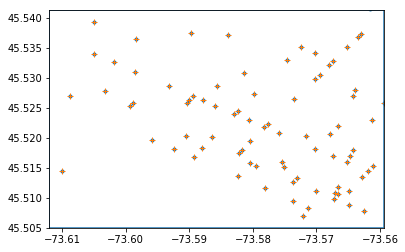

In [65]:
lat, lon, weight = data[:,0], data[:,1], data[:,2] 

ind1 = np.where(45.5049722>lat)
ind2 = index1 = np.where(lat >45.5412594)

ind3 = np.where(-73.61204552>lon)
ind4 = index1 = np.where(lon>-73.5593741)

ind  = np.unique(np.concatenate((ind1, ind2, ind3, ind4), axis=None))

lon_short = np.delete(lon,ind)
lat_short = np.delete(lat,ind)

plt.figure()
plt.plot(lon, lat, '.')
plt.plot(lon_short, lat_short, '+')

plt.axhline(y=45.5049722)
plt.axhline(y=45.5412594)
plt.axvline(x=-73.6120455)
plt.axvline(x=-73.5593741)

plt.ylim(45.5049722, 45.5412594)
plt.xlim(-73.6120455, -73.5593741)

In [67]:
def Gaussian2D(position, amp, xo, yo, sigx=0.005, sigy=0.005):
    '''
    Create a 2D Gaussian array.

    Parameters
    ----------

    position  : 3D array 
        Meshgrids of x and y indices of pixels. position[:,:,0] = x and
        position[:,:,1] = y.

    amp       : float
        Amplitude of the 2D Gaussian.

    xo        : float
        x value of the peak of the 2D Gaussian.

    yo        : float
        y value of the peak of the 2D Gaussian.

    sigx      : float
        Width of the 2D Gaussian along the x axis.

    sigy      : float
        Width of the 2D Gaussian along the y axis.

    Returns
    -------
    PSF.ravel(): 1D array
        z values of the 2D Gaussian raveled.
    '''
    centroid = [yo, xo]
    cov = [[sigy**2, 0],[0, sigx**2]]
    rv = st.multivariate_normal(mean = centroid, cov = cov)
    PSF = amp*(rv.pdf(position))
    return PSF

In [90]:
# creating the position
nx, ny = (1000, 1000)
x = np.linspace(45.5049722, 45.5412594, nx)
y = np.linspace(-73.6120455, -73.5593741, ny)
xv, yv = np.meshgrid(x, y)

position = np.dstack((xv, yv))

danger_map = np.zeros((1000, 1000))
for i in range(len(lon_short)):
#for i in range(2):
    tmp = Gaussian2D(position, weight[i], lon_short[i], 
                     lat_short[i], sigx=0.001, sigy=0.001)
    danger_map += tmp

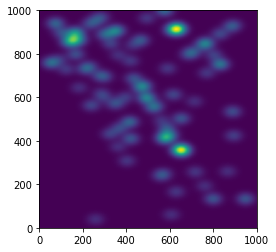

In [91]:
plt.imshow(danger_map, origin="lower", cmap='viridis')

In [101]:
def get_color(radius):
    # min and max cluster size
    norm = clrs.Normalize(vmin=2, vmax=7) # Min/max cluster size
    m = cm.ScalarMappable(norm=norm, cmap='YlOrRd') # Choose colormap (from YeLlow to ReD)
    rgbs = m.to_rgba(radius)[:-1] # Remove opacity
    return clrs.rgb2hex(rgbs) # Turn into hex, because folium.Polyline doesn’t take rgb


import folium
from geopy.geocoders import Nominatim

geolocator = Nominatim()
location = geolocator.geocode('McGill University Montreal Quebec')
lat_mon = float(location.raw['lat'])
lng_mon = float(location.raw['lon'])
m = folium.Map(location=[lat_mon,lng_mon],tiles='Stamen Toner',zoom_start=14)
# for lat,lng,radius in cluster_means:
#     folium.CircleMarker(location = (lat,lng),radius = np.sqrt(10*radius),color = get_color(np.sqrt(radius)),fill=True,fill_opacity = 0.8).add_to(m)
# m.save('../hotspots.html')

In [112]:
import matplotlib.colors as clrs
import matplotlib.cm as cm

for i in range(10):
    lat, lon = lon_short[i], lat_short[i]
    folium.CircleMarker(location = (lat,lon),radius = np.sqrt(100000),color = get_color(np.sqrt(100000)),fill=True,fill_opacity = 0.8).add_to(m)
m.save('../dangercircles.html')
    

In [113]:
import pickle

In [115]:
with open('../data/maps.pkl','rb') as f:
    density_map,boolean_map = pickle.load(f)

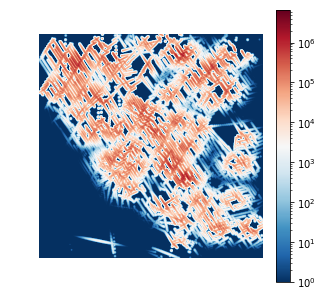

In [192]:
from matplotlib.colors import LogNorm


plt.figure(figsize=(5,5))
plt.imshow((boolean_map*danger_map)+1, interpolation='gaussian', origin='lower', cmap='RdBu_r', norm=LogNorm(vmin=1, vmax=1+danger_map.max()))
plt.colorbar()
plt.axis('off')
plt.savefig('bool_danger_map.png', transparent=True)
           

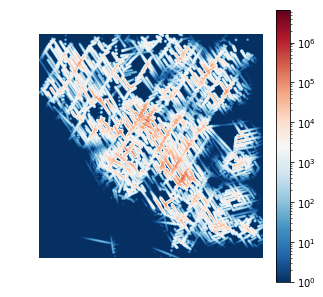

In [193]:

plt.figure(figsize=(5,5))
plt.imshow((boolean_map*danger_map/density_map*0.00001)+1, interpolation = 'gaussian', origin='lower', cmap='RdBu_r', norm=LogNorm(vmin=1, vmax=1+danger_map.max()))
#plt.imshow((boolean_map*danger_map*density_map), origin='lower', cmap='gray', vmin=10000000000, vmax=0+danger_map.max())
plt.colorbar()
plt.axis('off')
plt.savefig('density_danger_map.png', transparent=True)

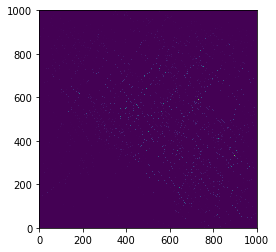

In [118]:
plt.imshow(density_map, origin='lower')